# Business Problem 

In recent years, City Hotel and Resort Hotel have seen high cancellation rates. Each hotel is now dealing with a number of issues as a result, including fewer revenues and less than ideal hotel room use. Consequently, lowering cancellation rates is both hotels' primary goal in order to increase their efficiency in generating revenue, and for us to offer thorough business advice to address this problem. The analysis of hotel booking cancellations as well as other factors that have no bearing on their business and yearly revenue generation are the main topics of this report.

# Research Question 
1. What are the variables that affect hotel reservation cancellations? Is the price main issue?
2. Are there differences in cancellation rates between City Hotel and Resort Hotel, and if so, what factors may contribute to these differences?
3. What geographic factors might influence cancellation behavior?

# Hypothesis 
1. Prices are given in USD($).
2. More cancellations occur when prices are higher.
3. When there is a longer waiting list, customers tend to cancel more frequently.
4. The majority of clients are coming from offline travel agents to make their reservations

# Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

# Loading the dataset

In [2]:
df= pd.read_csv('hotel_booking.csv')

In [3]:
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,Transient,0.00,0,0,Check-Out,2015-07-01,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,Transient,0.00,0,0,Check-Out,2015-07-01,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,Transient,75.00,0,0,Check-Out,2015-07-02,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,Transient,75.00,0,0,Check-Out,2015-07-02,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,Transient,98.00,0,1,Check-Out,2015-07-03,Linda Hines,LHines@verizon.com,713-226-5883,************5498
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,Transient,96.14,0,0,Check-Out,2017-09-06,Claudia Johnson,Claudia.J@yahoo.com,403-092-5582,************8647
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,Transient,225.43,0,2,Check-Out,2017-09-07,Wesley Aguilar,WAguilar@xfinity.com,238-763-0612,************4333
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,Transient,157.71,0,4,Check-Out,2017-09-07,Mary Morales,Mary_Morales@hotmail.com,395-518-4100,************1821
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,Transient,104.40,0,0,Check-Out,2017-09-07,Caroline Conley MD,MD_Caroline@comcast.net,531-528-1017,************7860


# Cleaning the data

# i) Checking null values and removing it (if required)

In [4]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [5]:
df['agent'].unique()

array([ nan, 304., 240., 303.,  15., 241.,   8., 250., 115.,   5., 175.,
       134., 156., 243., 242.,   3., 105.,  40., 147., 306., 184.,  96.,
         2., 127.,  95., 146.,   9., 177.,   6., 143., 244., 149., 167.,
       300., 171., 305.,  67., 196., 152., 142., 261., 104.,  36.,  26.,
        29., 258., 110.,  71., 181.,  88., 251., 275.,  69., 248., 208.,
       256., 314., 126., 281., 273., 253., 185., 330., 334., 328., 326.,
       321., 324., 313.,  38., 155.,  68., 335., 308., 332.,  94., 348.,
       310., 339., 375.,  66., 327., 387., 298.,  91., 245., 385., 257.,
       393., 168., 405., 249., 315.,  75., 128., 307.,  11., 436.,   1.,
       201., 183., 223., 368., 336., 291., 464., 411., 481.,  10., 154.,
       468., 410., 390., 440., 495., 492., 493., 434.,  57., 531., 420.,
       483., 526., 472., 429.,  16., 446.,  34.,  78., 139., 252., 270.,
        47., 114., 301., 193., 182., 135., 350., 195., 352., 355., 159.,
       363., 384., 360., 331., 367.,  64., 406., 16

We will remove null values from country and children columns and we will be dropping agent and company columns as there are numberic and currently we wont need as per the business problem

In [6]:
df.drop(['agent','company'], axis=1, inplace=True)
df.dropna(how='any', inplace= True)

In [7]:
df.reset_index(drop = True)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,Transient,0.00,0,0,Check-Out,2015-07-01,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,Transient,0.00,0,0,Check-Out,2015-07-01,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,Transient,75.00,0,0,Check-Out,2015-07-02,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,Transient,75.00,0,0,Check-Out,2015-07-02,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,Transient,98.00,0,1,Check-Out,2015-07-03,Linda Hines,LHines@verizon.com,713-226-5883,************5498
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118893,City Hotel,0,23,2017,August,35,30,2,5,2,...,Transient,96.14,0,0,Check-Out,2017-09-06,Claudia Johnson,Claudia.J@yahoo.com,403-092-5582,************8647
118894,City Hotel,0,102,2017,August,35,31,2,5,3,...,Transient,225.43,0,2,Check-Out,2017-09-07,Wesley Aguilar,WAguilar@xfinity.com,238-763-0612,************4333
118895,City Hotel,0,34,2017,August,35,31,2,5,2,...,Transient,157.71,0,4,Check-Out,2017-09-07,Mary Morales,Mary_Morales@hotmail.com,395-518-4100,************1821
118896,City Hotel,0,109,2017,August,35,31,2,5,2,...,Transient,104.40,0,0,Check-Out,2017-09-07,Caroline Conley MD,MD_Caroline@comcast.net,531-528-1017,************7860


In [8]:
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

# ii) Checking the duplicate values and removing it (id required)

In [9]:
df.duplicated().sum()

0

# iii) Checking the columns and its data type and removing unnecessary ones

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 118898 entries, 0 to 119389
Data columns (total 34 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           118898 non-null  object 
 1   is_canceled                     118898 non-null  int64  
 2   lead_time                       118898 non-null  int64  
 3   arrival_date_year               118898 non-null  int64  
 4   arrival_date_month              118898 non-null  object 
 5   arrival_date_week_number        118898 non-null  int64  
 6   arrival_date_day_of_month       118898 non-null  int64  
 7   stays_in_weekend_nights         118898 non-null  int64  
 8   stays_in_week_nights            118898 non-null  int64  
 9   adults                          118898 non-null  int64  
 10  children                        118898 non-null  float64
 11  babies                          118898 non-null  int64  
 12  meal                 

We do not required email, phone-number and credit card columns for analysing current business problem

In [11]:
df.drop(['email','phone-number','credit_card'], axis=1, inplace=True)

In [12]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'name'],
      dtype='object')

We need to change the data type of reservation_status_date as datatime and children to int

In [13]:
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'])
df['children'] = df['children'].astype(np.int64)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 118898 entries, 0 to 119389
Data columns (total 31 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           118898 non-null  object        
 1   is_canceled                     118898 non-null  int64         
 2   lead_time                       118898 non-null  int64         
 3   arrival_date_year               118898 non-null  int64         
 4   arrival_date_month              118898 non-null  object        
 5   arrival_date_week_number        118898 non-null  int64         
 6   arrival_date_day_of_month       118898 non-null  int64         
 7   stays_in_weekend_nights         118898 non-null  int64         
 8   stays_in_week_nights            118898 non-null  int64         
 9   adults                          118898 non-null  int64         
 10  children                        118898 non-null  int64       

We need to change the adr column name to price for better understanding

In [15]:
df['is_canceled'].value_counts()

is_canceled
0    74745
1    44153
Name: count, dtype: int64

In [16]:
df['reservation_status'].value_counts()

reservation_status
Check-Out    74745
Canceled     42950
No-Show       1203
Name: count, dtype: int64

It seems that these both columns have the same values, therefore we need to drop the reservation_status column

In [17]:
df.drop('reservation_status',axis=1,inplace = True)

In [18]:
df.rename(columns= {'adr' :'price'}, inplace = True )

# iv) checking the outliers

In [19]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,price,required_car_parking_spaces,total_of_special_requests,reservation_status_date
count,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898
mean,0.371352,104.311435,2016.157656,27.166555,15.800880,0.928897,2.502145,1.858391,0.104207,0.007948,0.032011,0.087142,0.131634,0.221181,2.330754,102.003243,0.061885,0.571683,2016-07-30 07:37:53.336809984
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000,2014-10-17 00:00:00
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.000000,0.000000,0.000000,2016-02-02 00:00:00
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,95.000000,0.000000,0.000000,2016-08-08 00:00:00
75%,1.000000,161.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000,2017-02-09 00:00:00
max,1.000000,737.000000,2017.000000,53.000000,31.000000,16.000000,41.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,391.000000,5400.000000,8.000000,5.000000,2017-09-14 00:00:00
std,0.483168,106.903309,0.707459,13.589971,8.780324,0.996216,1.900168,0.578576,0.399172,0.097380,0.176029,0.845869,1.484672,0.652785,17.630452,50.485862,0.244172,0.792678,NaN


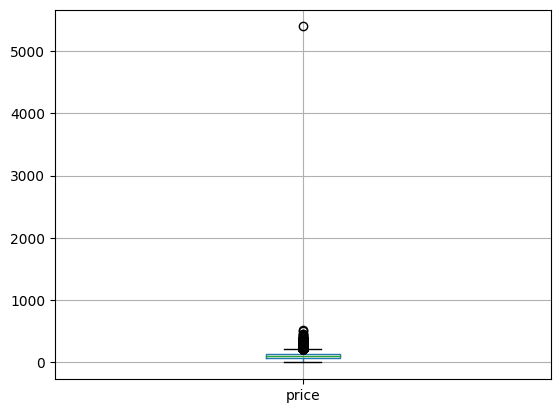

In [20]:
df.boxplot(column=['price'], grid = True)
plt.show()

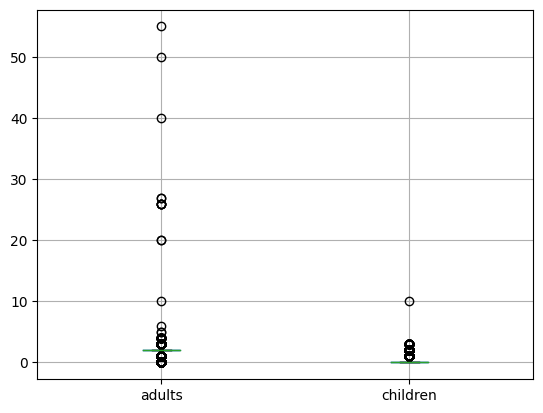

In [21]:
df.boxplot(column=['adults', 'children'], grid = True)
plt.show()

In [22]:
df[(df['adults']>= 30) | (df['children']>= 10)] [['hotel' ,'price', 'adults', 'children']]

,hotel,price,adults,children
328,Resort Hotel,133.16,2,10
1539,Resort Hotel,0.00,40,0
1643,Resort Hotel,0.00,50,0
2173,Resort Hotel,0.00,55,0


So, we will be removing outliers for price and children columns

In [23]:
df=df[~((df['price']>= 5000 ) | (df['children'] >= 8))]

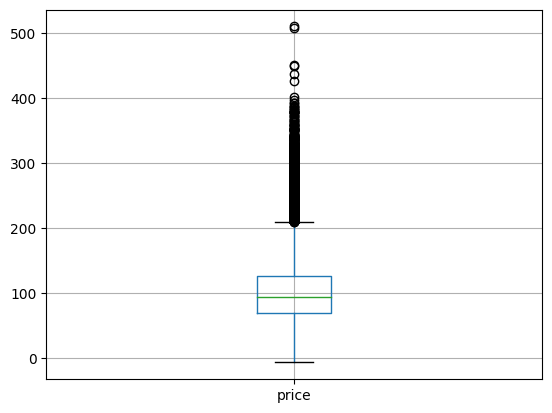

In [24]:
df.boxplot(column=['price'], grid = True)
plt.show()

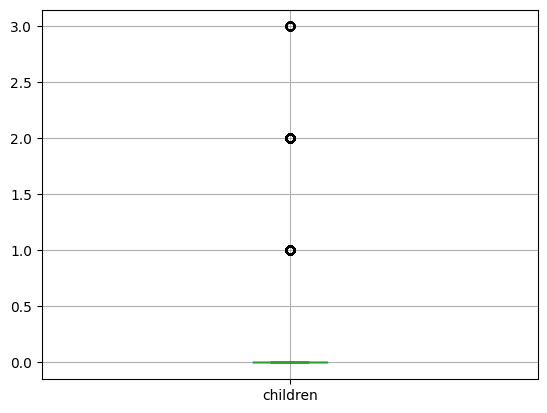

In [25]:
df.boxplot(column=['children'], grid = True)
plt.show()

# Analysing the data and Visualising the data

Q.01: What are total numbers of hotel reservation cancellations?

In [26]:
cancellation_in_numbers = df['is_canceled'].value_counts()
print("Reservation cancelled in numbers")
print(cancellation_in_numbers)

cancellation_in_percentage = df['is_canceled'].value_counts(normalize=True)
print("\nReservation cancelled in percentage")
print(cancellation_in_percentage)

Reservation cancelled in numbers
is_canceled
0    74745
1    44151
Name: count, dtype: int64

Reservation cancelled in percentage
is_canceled
0    0.628659
1    0.371341
Name: proportion, dtype: float64


Here, 0 means Not canceled and 1 means Canceled

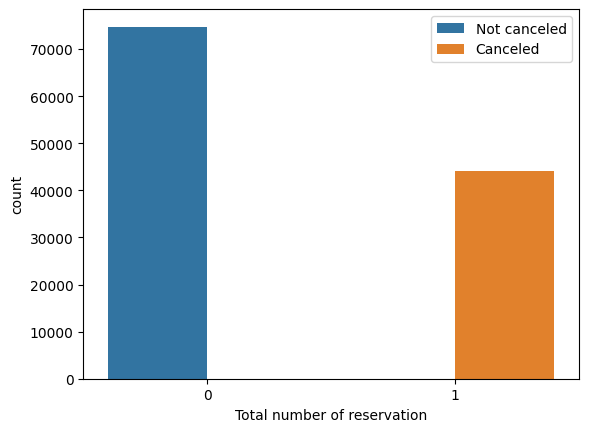

In [27]:
sns.countplot(x='is_canceled', hue='is_canceled', data=df)
plt.xlabel("Total number of reservation")
plt.legend(loc='upper right', labels=['Not canceled', 'Canceled'])
plt.show()

Q.02: What are the cancellations numbers of City Hotel and Resort Hotel?

Here, 0 means Not canceled and 1 means Canceled

In [28]:
df.groupby(['hotel','is_canceled'])['is_canceled'].agg(['count'])

count
hotel        is_canceled       
City Hotel   0            46226
             1            33075
Resort Hotel 0            28519
             1            11076

In [29]:
df_CityHotel = df[df['hotel'] =='City Hotel']
CityHotelcancellation_in_percentage = df_CityHotel['is_canceled'].value_counts(normalize= True)
print("Reservation canceled of City Hotel in percentage")
print(CityHotelcancellation_in_percentage)

Reservation canceled of City Hotel in percentage
is_canceled
0    0.582918
1    0.417082
Name: proportion, dtype: float64


In [30]:
df_ResortHotel = df[df['hotel'] =='Resort Hotel']
ResortHotel_cancellation_in_percentage = df_ResortHotel['is_canceled'].value_counts(normalize= True)
print("Reservation canceled of Resort Hotel in percentage")
print(ResortHotel_cancellation_in_percentage)

Reservation canceled of Resort Hotel in percentage
is_canceled
0    0.720268
1    0.279732
Name: proportion, dtype: float64


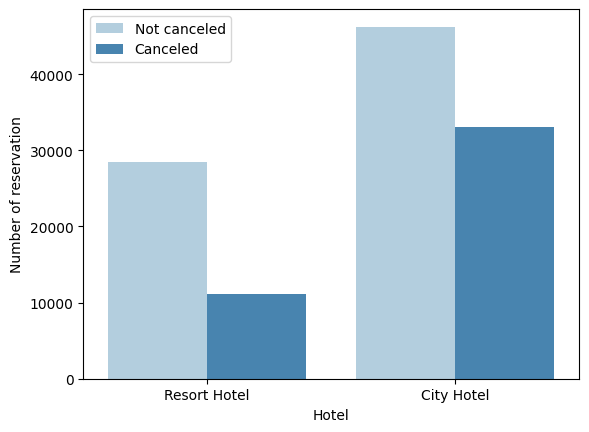

In [31]:
sns.countplot(x='hotel', hue='is_canceled', data=df, palette= "Blues")
plt.xlabel("Hotel")
plt.ylabel("Number of reservation")
plt.legend(loc='upper left', labels=['Not canceled', 'Canceled'])
plt.show()

Q.03: What is average daily rate in City and Resort Hotel?

In [32]:
df.groupby(['reservation_status_date','hotel'])['price'].agg(['mean'])

mean
reservation_status_date hotel                   
2014-10-17              City Hotel     62.800000
2014-11-18              Resort Hotel    0.000000
2015-01-01              City Hotel     62.063158
                        Resort Hotel   61.966667
2015-01-02              Resort Hotel    9.633750
...                                          ...
2017-09-08              Resort Hotel  101.012500
2017-09-09              Resort Hotel  147.778333
2017-09-10              Resort Hotel  145.272500
2017-09-12              Resort Hotel  153.570000
2017-09-14              Resort Hotel  105.930000

[1777 rows x 1 columns]

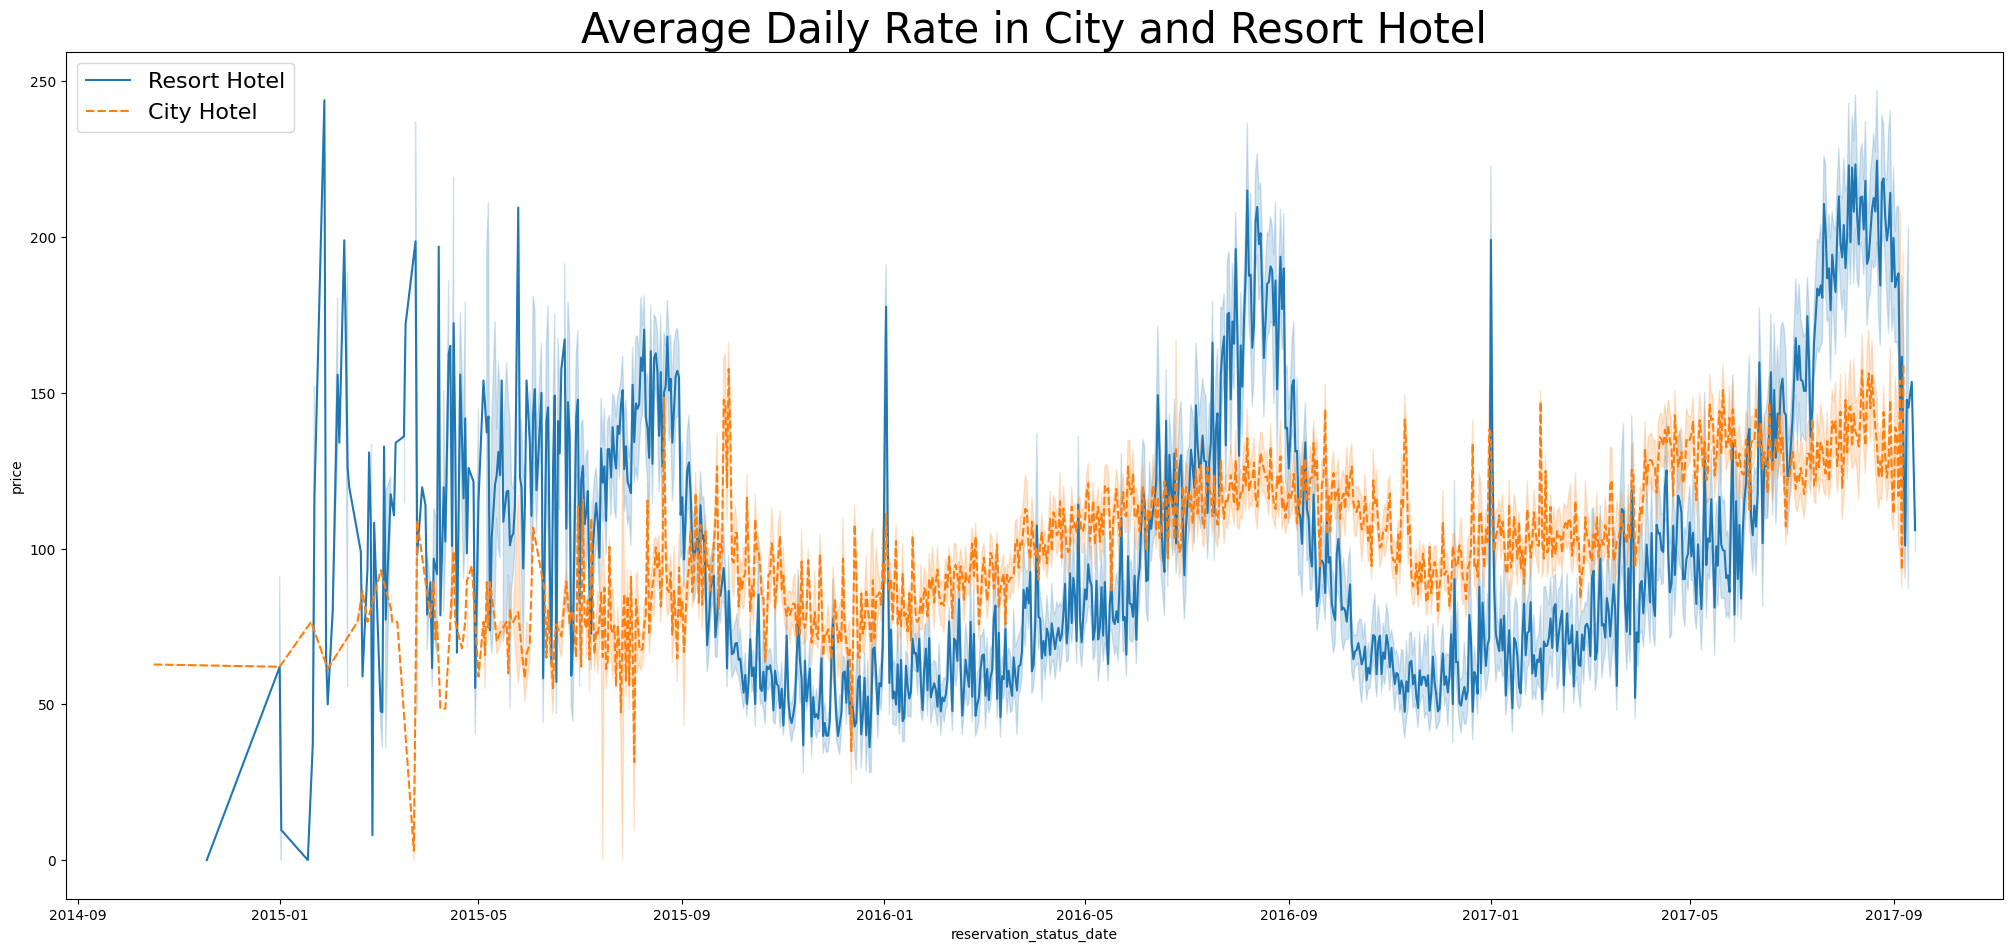

In [33]:
plt.figure(figsize=(25,11))
sns.lineplot(x = 'reservation_status_date' , y= 'price' , hue='hotel', style='hotel', data=df)
plt.title('Average Daily Rate in City and Resort Hotel', fontsize = 30)
plt.legend(loc='upper left',fontsize= 16)
plt.show()

Q.04: What is reservation status per month of City and Resort Hotel?

In [34]:
df_reservation_status_per_month =df.copy()

In [35]:
df_reservation_status_per_month['reservation_status_month'] = df_reservation_status_per_month['reservation_status_date'].dt.month

In [36]:
df_reservation_status_per_month

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,days_in_waiting_list,customer_type,price,required_car_parking_spaces,total_of_special_requests,reservation_status_date,name,reservation_status_month
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,3,No Deposit,0,Transient,0.00,0,0,2015-07-01,Ernest Barnes,7
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,4,No Deposit,0,Transient,0.00,0,0,2015-07-01,Andrea Baker,7
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0,No Deposit,0,Transient,75.00,0,0,2015-07-02,Rebecca Parker,7
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,0,No Deposit,0,Transient,75.00,0,0,2015-07-02,Laura Murray,7
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,0,No Deposit,0,Transient,98.00,0,1,2015-07-03,Linda Hines,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,0,No Deposit,0,Transient,96.14,0,0,2017-09-06,Claudia Johnson,9
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,0,No Deposit,0,Transient,225.43,0,2,2017-09-07,Wesley Aguilar,9
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,0,No Deposit,0,Transient,157.71,0,4,2017-09-07,Mary Morales,9
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,0,No Deposit,0,Transient,104.40,0,0,2017-09-07,Caroline Conley MD,9


In [37]:

look_up = {1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May',
            6: 'Jun', 7: 'Jul',8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'}


In [38]:
df_reservation_status_per_month['reservation_status_month'] = df_reservation_status_per_month['reservation_status_month'].apply(lambda x: look_up[x])

In [39]:
df_reservation_status_per_month

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,days_in_waiting_list,customer_type,price,required_car_parking_spaces,total_of_special_requests,reservation_status_date,name,reservation_status_month
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,3,No Deposit,0,Transient,0.00,0,0,2015-07-01,Ernest Barnes,Jul
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,4,No Deposit,0,Transient,0.00,0,0,2015-07-01,Andrea Baker,Jul
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0,No Deposit,0,Transient,75.00,0,0,2015-07-02,Rebecca Parker,Jul
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,0,No Deposit,0,Transient,75.00,0,0,2015-07-02,Laura Murray,Jul
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,0,No Deposit,0,Transient,98.00,0,1,2015-07-03,Linda Hines,Jul
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,0,No Deposit,0,Transient,96.14,0,0,2017-09-06,Claudia Johnson,Sep
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,0,No Deposit,0,Transient,225.43,0,2,2017-09-07,Wesley Aguilar,Sep
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,0,No Deposit,0,Transient,157.71,0,4,2017-09-07,Mary Morales,Sep
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,0,No Deposit,0,Transient,104.40,0,0,2017-09-07,Caroline Conley MD,Sep


In [40]:
df_reservation_status_per_month.groupby(['reservation_status_month','is_canceled'])['is_canceled'].agg(['count'])

count
reservation_status_month is_canceled       
Apr                      0             6493
                         1             3464
Aug                      0             8539
                         1             2684
Dec                      0             3835
                         1             3519
Feb                      0             5084
                         1             4351
Jan                      0             4562
                         1             6060
Jul                      0             7714
                         1             4359
Jun                      0             6354
                         1             2901
Mar                      0             6359
                         1             3818
May                      0             7156
                         1             3138
Nov                      0             4994
                         1             3058
Oct                      0             6954
                         1             4141
Sep                      0             6701
                         1             2658

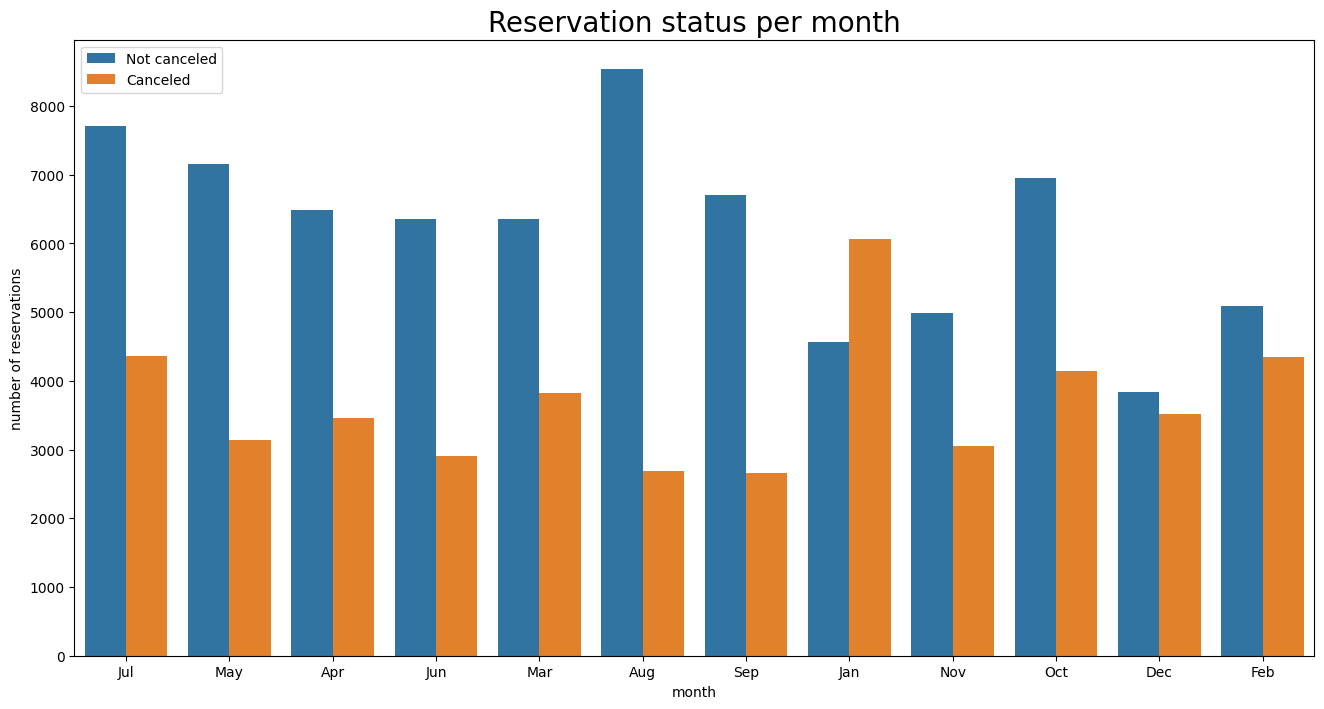

In [41]:
plt.figure(figsize=(16,8))
sns.countplot(x='reservation_status_month', hue='is_canceled', data = df_reservation_status_per_month)
plt.title('Reservation status per month', size = 20)
plt.xlabel('month') 
plt.ylabel('number of reservations')
plt.legend(loc='upper left', labels=['Not canceled', 'Canceled'])
plt.show()

Highest cancellation has been performed in January and lowest in August and September months. Reservation is highest in month of August and lowest is in December.

So, based on some analysis there is some insight that when our cancellation is the least then our reservation is maximum and when our cancellation is maximum then our reservation is less.

Q.05: What are the prices per month when the reservation status was canceled?

In [42]:
df_prices_per_month = df_reservation_status_per_month.copy()

In [43]:
df_prices_per_month

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,days_in_waiting_list,customer_type,price,required_car_parking_spaces,total_of_special_requests,reservation_status_date,name,reservation_status_month
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,3,No Deposit,0,Transient,0.00,0,0,2015-07-01,Ernest Barnes,Jul
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,4,No Deposit,0,Transient,0.00,0,0,2015-07-01,Andrea Baker,Jul
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0,No Deposit,0,Transient,75.00,0,0,2015-07-02,Rebecca Parker,Jul
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,0,No Deposit,0,Transient,75.00,0,0,2015-07-02,Laura Murray,Jul
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,0,No Deposit,0,Transient,98.00,0,1,2015-07-03,Linda Hines,Jul
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,0,No Deposit,0,Transient,96.14,0,0,2017-09-06,Claudia Johnson,Sep
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,0,No Deposit,0,Transient,225.43,0,2,2017-09-07,Wesley Aguilar,Sep
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,0,No Deposit,0,Transient,157.71,0,4,2017-09-07,Mary Morales,Sep
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,0,No Deposit,0,Transient,104.40,0,0,2017-09-07,Caroline Conley MD,Sep


In [44]:
df_prices_per_month_status_canceled = df_prices_per_month[df_prices_per_month['is_canceled']==1]
df_prices_per_month_status_canceled

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,days_in_waiting_list,customer_type,price,required_car_parking_spaces,total_of_special_requests,reservation_status_date,name,reservation_status_month
8,Resort Hotel,1,85,2015,July,27,1,0,3,2,...,0,No Deposit,0,Transient,82.0,0,1,2015-05-06,Steven Murphy,May
9,Resort Hotel,1,75,2015,July,27,1,0,3,2,...,0,No Deposit,0,Transient,105.5,0,0,2015-04-22,Michael Moore,Apr
10,Resort Hotel,1,23,2015,July,27,1,0,4,2,...,0,No Deposit,0,Transient,123.0,0,0,2015-06-23,Priscilla Collins PhD,Jun
27,Resort Hotel,1,60,2015,July,27,1,2,5,2,...,0,No Deposit,0,Transient,107.0,0,2,2015-05-11,Jaime Flynn,May
32,Resort Hotel,1,96,2015,July,27,1,2,8,2,...,0,No Deposit,0,Transient,108.3,0,2,2015-05-29,Reginald Cunningham,May
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110280,City Hotel,1,132,2017,April,17,25,0,0,0,...,1,No Deposit,0,Transient,0.0,0,3,2017-04-25,Robert Webb,Apr
111355,City Hotel,1,4,2017,June,23,5,1,0,1,...,0,No Deposit,0,Transient,65.0,0,0,2017-06-05,Jill Chapman,Jun
111924,City Hotel,1,7,2017,May,22,31,0,1,1,...,0,No Deposit,0,Transient,65.0,0,0,2017-05-31,Joseph Snyder,May
111925,City Hotel,1,6,2017,July,29,17,1,0,1,...,0,No Deposit,0,Transient,65.0,0,0,2017-07-17,Lisa Berg,Jul


In [45]:
df_prices_per_month_status_canceled.groupby(['reservation_status_month','hotel'])['price'].agg(['mean'])

mean
reservation_status_month hotel                   
Apr                      City Hotel    124.059450
                         Resort Hotel  119.500536
Aug                      City Hotel    113.479273
                         Resort Hotel  140.762665
Dec                      City Hotel     95.811953
                         Resort Hotel   72.548479
Feb                      City Hotel    105.753402
                         Resort Hotel   93.786744
Jan                      City Hotel     98.462818
                         Resort Hotel   79.347209
Jul                      City Hotel     98.346337
                         Resort Hotel  148.016777
Jun                      City Hotel    114.777489
                         Resort Hotel  138.683682
Mar                      City Hotel    113.775210
                         Resort Hotel  105.524610
May                      City Hotel    122.417290
                         Resort Hotel  130.848069
Nov                      City Hotel     97.323393
                         Resort Hotel   72.212056
Oct                      City Hotel     82.738942
                         Resort Hotel   67.741403
Sep                      City Hotel    110.199777
                         Resort Hotel   78.923189

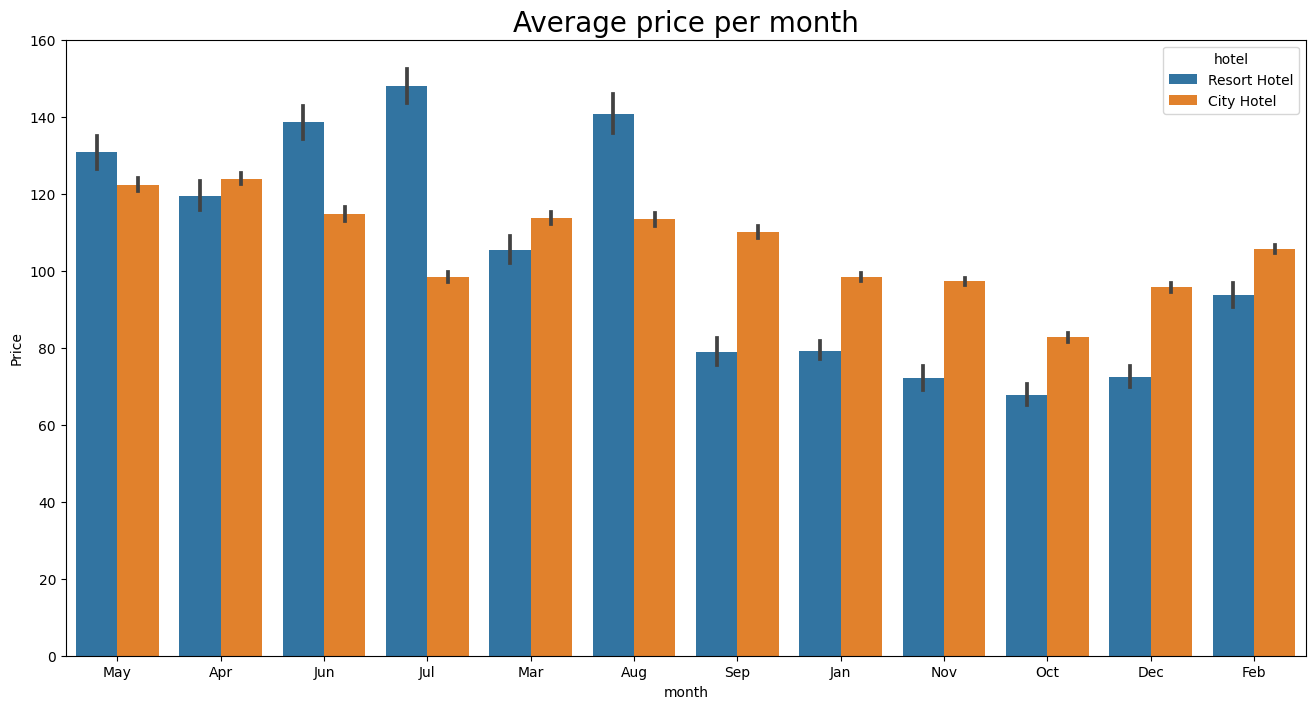

In [46]:
plt.figure(figsize=(16,8))
sns.barplot(x='reservation_status_month', y= 'price',hue='hotel',data = df_prices_per_month_status_canceled)
plt.title('Average price per month', size = 20)
plt.xlabel('month') 
plt.ylabel('Price')
plt.show()

Its seems that the price is not a major issue in terms of booking cancellation. As seen highest cancellation has been performed in January and lowest in August and September months but the average prices in January are decent compared to other months.

Q.06: Which types of deposits are often linked to reservation cancellations, and which market segment tends to make the most reservations that end up being canceled?

In [47]:
df_DepositTypes_and_MarketSegment = df_prices_per_month_status_canceled.copy()

In [48]:
df_DepositTypes_and_MarketSegment.columns



Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'price',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status_date', 'name', 'reservation_status_month'],
      dtype='object')

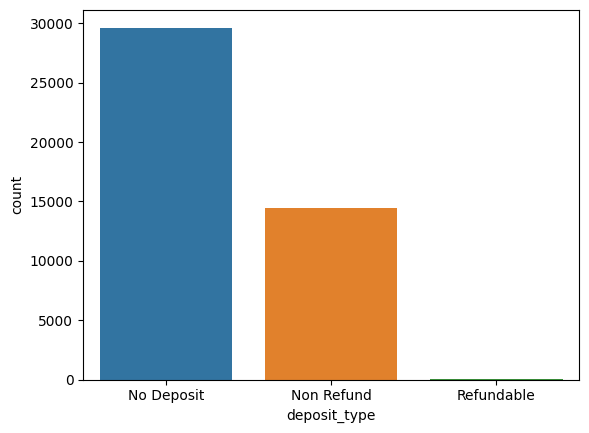

In [49]:
sns.countplot(x='deposit_type', data = df_DepositTypes_and_MarketSegment)
plt.show()

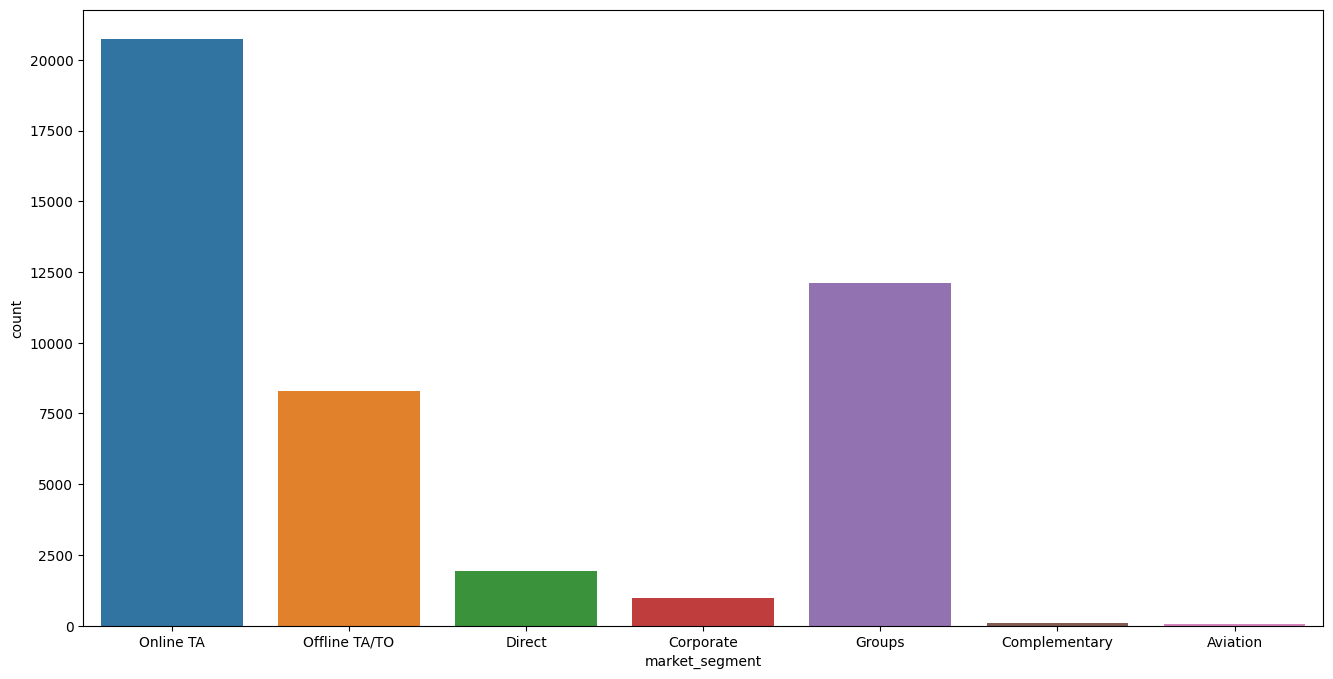

In [50]:
plt.figure(figsize=(16,8))
sns.countplot(x='market_segment', data = df_DepositTypes_and_MarketSegment)
plt.show()

Findings suggest that reservation cancellations in hotels are primarily due to customers not making any upfront deposits when booking. Furthermore, a significant proportion of these reservations are made through online platforms and subsequently canceled

Q.07: Can waiting time for reservation be a factor for cancellations?

In [51]:
df_waiting_period = df_prices_per_month_status_canceled.copy()

In [52]:
df_waiting_period.groupby(['reservation_status_month','hotel'])['days_in_waiting_list'].agg(['max','min', 'mean'])

max  min       mean
reservation_status_month hotel                            
Apr                      City Hotel    187    0   0.367830
                         Resort Hotel  121    0   0.169928
Aug                      City Hotel    379    0   3.151230
                         Resort Hotel    0    0   0.000000
Dec                      City Hotel    165    0   8.260000
                         Resort Hotel  122    0   0.395319
Feb                      City Hotel    215    0   3.745921
                         Resort Hotel   22    0   0.021134
Jan                      City Hotel    187    0   8.072350
                         Resort Hotel   50    0   0.085521
Jul                      City Hotel    223    0   1.177522
                         Resort Hotel    1    0   0.000945
Jun                      City Hotel    147    0   2.613135
                         Resort Hotel    0    0   0.000000
Mar                      City Hotel    236    0   3.627252
                         Resort Hotel  100    0   0.090988
May                      City Hotel    215    0   1.127585
                         Resort Hotel   61    0   0.070520
Nov                      City Hotel    100    0   6.167980
                         Resort Hotel   34    0   0.052550
Oct                      City Hotel    193    0   4.762485
                         Resort Hotel  125    0   0.160875
Sep                      City Hotel    391    0  11.964546
                         Resort Hotel  101    0   0.168614

Based on our previous analysis, we found that the highest number of cancellations occurred in January, while December had the lowest number of reservations. This suggests that waiting time, possibly longer waiting periods, could be a contributing factor to booking cancellations at city hotels

In [53]:
df_waiting_period['reserved_room_type'].value_counts()

reserved_room_type
A    33578
D     6100
E     1909
F      880
G      763
B      364
C      308
H      245
L        2
P        2
Name: count, dtype: int64

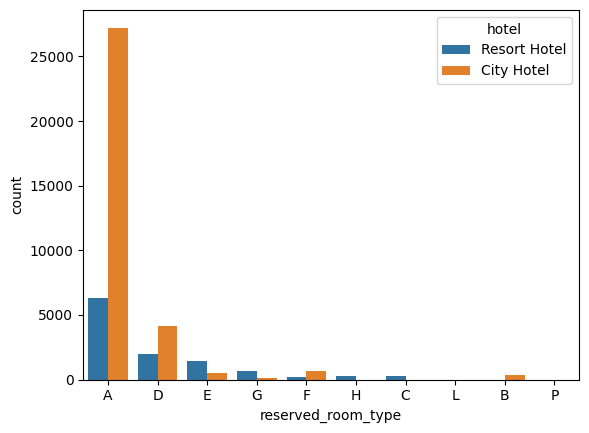

In [54]:
sns.countplot(x='reserved_room_type',hue ='hotel', data = df_waiting_period)
plt.show()

So, based on this findings Room type 'A' and its package services can also be a considerable factor for reservation cancelations

Q.08: Which country has the most cancelations for City and Resort Hotel?

In [55]:
cancelled_data = df[df['is_canceled'] == 1]
cancelled_data_top10_country=cancelled_data.groupby('country',as_index= False)['country'].agg(['count'])

In [56]:
cancelled_data_top10_country= cancelled_data_top10_country.sort_values(by='count', ascending=False).head(10).reset_index(drop=True)
cancelled_data_top10_country

,country,count
0,PRT,27513
1,GBR,2453
2,ESP,2177
3,FRA,1934
4,ITA,1333
5,DEU,1218
6,IRL,832
7,BRA,830
8,USA,501
9,BEL,474


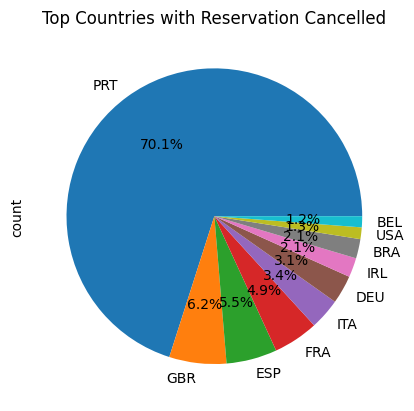

In [57]:
cancelled_data_top10_country.plot(kind='pie', y='count', labels=cancelled_data_top10_country['country'], autopct='%1.1f%%', legend=False)
plt.title('Top Countries with Reservation Cancelled')
plt.show()

The findings reveal that Portugal experiences the highest number of hotel cancellations, following the United Kingdom and Spain in the rankings.

Q.09: Are these hotels successfully retaining their customers?

In [58]:
df_repeated_customers = df.copy()

In [59]:
df_repeated_customers['is_repeated_guest'].value_counts()

is_repeated_guest
0    115090
1      3806
Name: count, dtype: int64

In [60]:
df_repeated_customers['is_repeated_guest'].value_counts(normalize= True)

is_repeated_guest
0    0.967989
1    0.032011
Name: proportion, dtype: float64

In [61]:
df_repeated_customers=df_repeated_customers[df_repeated_customers['is_repeated_guest'] == 0]

In [62]:
df_repeated_customers.groupby('hotel')['is_repeated_guest'].agg(['count'])

,count
hotel,
City Hotel,77269
Resort Hotel,37821


Based on our findings, the answer is affirmative, with a commendable retention rate of 96%. The City Hotel retained 77,269 customers, while the Resort Hotel kept 37,821 customers.

# --------------------------------------------

# Conclusion and Suggestion:


1. 

Conclusion: Its seems that the price is not a major issue in terms of booking cancellation. As seen highest cancellation has been performed in January and lowest in August and September months but the average prices in January are decent compared to other months.

Suggestion: To address the peak cancellations in January and leverage the lower cancellations in August and September, create targeted marketing campaigns and promotions. Offer exclusive packages or discounts for January bookings to entice potential guests and fill up the available rooms. For the quieter months of August and September, consider running loyalty programs or special events to attract more bookings during this period. Tailoring your marketing efforts to match seasonal demand fluctuations can help optimize occupancy rates and reduce cancellations.

2. 

Conclusion (Major Factor): Reservation cancellations in hotels are primarily due to customers not making any upfront deposits when booking. Furthermore, a significant proportion of these reservations are made through online platforms and subsequently canceled.

Suggestion: For reservations made online, consider implementing a deposit policy, requiring a partial prepayment to secure the booking. This can significantly reduce last-minute cancellations. Additionally, offer flexible deposit options, such as refundable deposits or staggered payments, to make it more appealing for customers to commit. Clearly communicate the deposit policy during the online booking process, ensuring transparency and trust.

3. 

Conclusion: Earlier, we found that the highest number of cancellations occurred in January, while December had the lowest number of reservations. This suggests that waiting time, possibly longer waiting periods, could be a contributing factor to booking cancellations at city hotels.

Suggestion: Consider implementing a real-time reservation system that provides customers with estimated wait times and allows them to join a virtual queue. Provide incentives, such as discounts or room upgrades, for guests who are willing to wait for their preferred booking times. This can improve the booking experience and reduce cancellations due to waiting times.

4. 

Conclusion: So, based on this findings Room type 'A' and its package services can also be a considerable factor for reservation cancelations.

Suggestion: Conduct a survey or gather feedback from guests who canceled reservations with Room Type 'A' to understand their specific concerns. Based on the feedback, make necessary improvements or offer alternatives. Highlight the unique benefits of Room Type 'A' and its packages in your marketing materials to increase interest and bookings.

5. 

Conclusion: The findings reveal that Portugal experiences the highest number of hotel cancellations, following the United Kingdom and Spain in the rankings.

Suggestion: Explore region-specific factors leading to cancellations in Portugal, the United Kingdom, and Spain. Collaborate with local partners and travel agencies in these regions to increase brand visibility and offer region-specific promotions or packages.

6. 

Conclusion: Despite the high number of cancellations, the hotels have commendable retention rates. 

Suggestion: Emphasize this positive aspect in marketing and customer communications.Consider personalized offers, discounts, or exclusive perks for loyal guests to enhance their experience and loyalty.

